In [1]:
# 2-1-1. checkpoint 1) Define the Hard-Sphere potential function
def hard_sphere_potential(r, sigma):
    if r < sigma:
        return float('inf')  # Infinite repulsion inside the hard sphere
    else:
        return 0  # No interaction beyond the hard sphere

# 2-1-1. checkpoint 1) Define the Square-Well potential function
def square_well_potential(r, sigma, epsilon, lambda_param):
    if r < sigma:
        return float('inf')  # Infinite repulsion inside the particle diameter
    elif sigma <= r < lambda_param * sigma:
        return -epsilon  # deptho of the potential well
    else:
        return 0  # No interaction beyond lambda*sigma

# 2-1-1. checkpoint 1) Define the Lennard-Jones potential function
def lennard_jones_potential(r, epsilon, sigma):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Test the potential functions with example parameters
r_test = 1.0  # Example distance
sigma_test = 1.0  # Example particle diameter
epsilon_test = 0.01  # Example depth of potential well
lambda_test = 1.5  # Example range for square well

# Test each potential
hs_potential = hard_sphere_potential(r_test, sigma_test)
sw_potential = square_well_potential(r_test, sigma_test, epsilon_test, lambda_test)
lj_potential = lennard_jones_potential(r_test, epsilon_test, sigma_test)

print(f"Hard-Sphere Potential: {hs_potential}")
print(f"Square-Well Potential: {sw_potential}")
print(f"Lennard-Jones Potential: {lj_potential}")

Hard-Sphere Potential: 0
Square-Well Potential: -0.01
Lennard-Jones Potential: 0.0


In [2]:
# 2-1-2. checkpoint 1) Use numerical integration (e.g., scipy.integrate.trapezoid)
import numpy as np
from scipy.constants import k, N_A # import two physical constants k(Boltzmann constant, 1.380649×10^−23 J/K) and N_A(Avogadro's number, 6.02214076×10^23 mol−1)
from scipy.integrate import trapezoid

# Define constants
T = 100  # Temperature in Kelvin


In [3]:
# 2-1-2. checkpoint 3) Redefine the sigma value for the hard-sphere potential as given in the problem
sigma_hard_sphere = 3.4  # Angstroms for hard-sphere potential

# The integration range for the hard-sphere potential based on the new sigma value
r_values = np.linspace(1e-3, 5 * sigma_hard_sphere, 1000)  # 2-1-2. checkpoint 2) from 1e-3 to 5 times sigma, 1000 points


In [4]:
# 2-1-2. checkpoint 3) Assume values for the potential parameters for the squre-well potential
sigma_square_well = 3.4  # Angstroms for square-well potential
epsilon_square_well = 0.01  # eV for well depth
lambda_square_well = 1.5  # Range of well

# Convert epsilon from eV to Joules
epsilon_square_well_joules = epsilon_square_well * 1.60218e-19  # Convert eV to J

# The integration range for the square-well potential
r_values = np.linspace(1e-3, 5 * sigma_square_well, 1000)  # 2-1-2. checkpoint 2)r from 1e-3 to 5 times sigma, 1000 points


In [5]:
# 2-1-2. checkpoint 3) Assume values for the potential parameters for the Lennard-Jones potential
sigma_lennard_jones = 3.4  # Angstroms for Lennard-Jones potential
epsilon_lennard_jones = 0.01  # eV for well depth

# Convert epsilon from eV to Joules
epsilon_lennard_jones_joules = epsilon_lennard_jones * 1.60218e-19  # Convert eV to J

# The integration range for the Lennard-Jones potential
r_values = np.linspace(1e-3, 5 * sigma_lennard_jones, 1000)  # 2-1-2. checkpoint 2)r from 1e-3 to 5 times sigma, 1000 points



In [6]:
# 2-1-2. checkpoint 4)Update the term ∞ as 1000

def hard_sphere_potential(r, sigma):
    if r < sigma:
        return 1000  # Approximate infinite repulsion with 1000
    else:
        return 0  # No interaction beyond the hard sphere

# 2-1-1. checkpoint 1) Define the Square-Well potential function
def square_well_potential(r, sigma, epsilon, lambda_param):
    if r < sigma:
        return 1000  # Approximate infinite repulsion with 1000
    elif sigma <= r < lambda_param * sigma:
        return -epsilon  # depth of the potential well
    else:
        return 0  # No interaction beyond lambda*sigma



In [7]:
# Define a range of temperatures from 100 K to 800 K
temperatures = np.linspace(100, 800, 8)  # Temperatures from 100 K to 800 K in steps of 100 K
epsilon = 0.01  # Example well depth in eV
lambda_param = 1.5  # Example range for square well

# Create arrays to store results
B2V_hard_sphere_values = []
B2V_square_well_values = []
B2V_lennard_jones_values = []

# Convert epsilon to Joules since k_B is in J/K
epsilon_joules = epsilon * 1.60218e-19  # Convert eV to J

# # Boltzmann constant in eV/K for easier calculations
# kB_eV = k / 1.60218e-19  # Convert kB from J/K to eV/K

# Define the integrand for B2V (e^-u(r)/kBT - 1) * r^2
def integrand(potential_func, r_values, T, *args):
    potential_values = np.array([potential_func(r, *args) for r in r_values])
    return (np.exp(-potential_values / (k * T)) - 1) * r_values**2

# Function to compute B2V for a given temperature and potential
def compute_B2V_for_potential(potential_func, r_values, T, *args):
    integrand_values = integrand(potential_func, r_values, T, *args)
    return -2 * np.pi * N_A * trapezoid(integrand_values, r_values)

# 2-1-3. checkpoint 1) Compute B2V for a range of temperature by using Loop over the temperature range
for T in temperatures:
    # Hard-Sphere potential
    hs_B2V = compute_B2V_for_potential(hard_sphere_potential, r_values, T, sigma_hard_sphere)
    B2V_hard_sphere_values.append(hs_B2V)
    
    # Square-Well potential
    sw_B2V = compute_B2V_for_potential(square_well_potential, r_values, T, sigma_square_well, epsilon_square_well_joules, lambda_square_well)
    B2V_square_well_values.append(sw_B2V)
    
    # Lennard-Jones potential
    lj_B2V = compute_B2V_for_potential(lennard_jones_potential, r_values, T, epsilon_lennard_jones_joules, sigma_lennard_jones)
    B2V_lennard_jones_values.append(lj_B2V)

formatted_B2V_hard_sphere = [f"{val:.3e}" for val in B2V_hard_sphere_values]
formatted_B2V_square_well = [f"{val:.3e}" for val in B2V_square_well_values]
formatted_B2V_lennard_jones = [f"{val:.3e}" for val in B2V_lennard_jones_values]

# Print the formatted results
print("B2V for Hard-Sphere Potential:")
print(formatted_B2V_hard_sphere)
print("\nB2V for Square-Well Potential:")
print(formatted_B2V_square_well)
print("\nB2V for Lennard-Jones Potential:")
print(formatted_B2V_lennard_jones)

B2V for Hard-Sphere Potential:
['4.938e+25', '4.938e+25', '4.938e+25', '4.938e+25', '4.938e+25', '4.938e+25', '4.938e+25', '4.938e+25']

B2V for Square-Well Potential:
['-2.084e+26', '-4.315e+25', '-6.184e+24', '9.783e+24', '1.865e+25', '2.428e+25', '2.817e+25', '3.102e+25']

B2V for Lennard-Jones Potential:
['-1.610e+26', '-4.350e+25', '-1.291e+25', '7.981e+23', '8.413e+24', '1.317e+25', '1.637e+25', '1.864e+25']


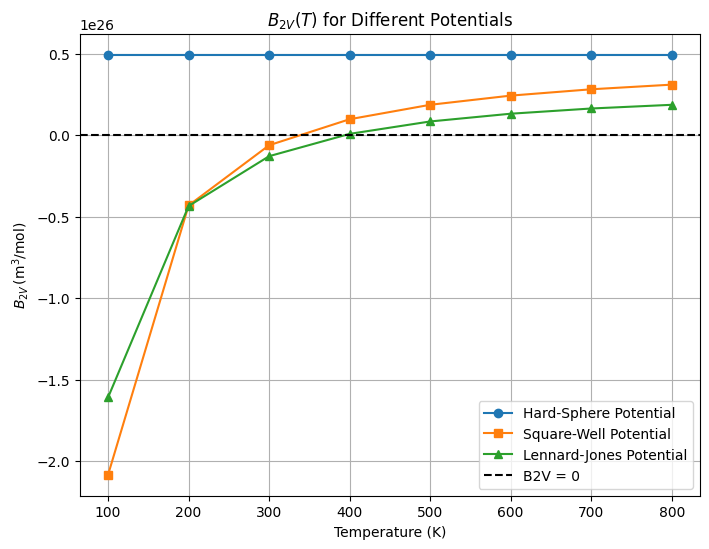

In [8]:
import matplotlib.pyplot as plt

# 2-1-3. checkpoint 2)Plot the B2V values for each potential
plt.figure(figsize=(8, 6))
plt.plot(temperatures, B2V_hard_sphere_values, label='Hard-Sphere Potential', marker='o')
plt.plot(temperatures, B2V_square_well_values, label='Square-Well Potential', marker='s')
plt.plot(temperatures, B2V_lennard_jones_values, label='Lennard-Jones Potential', marker='^')

# Add a line at B2V = 0
plt.axhline(0, color='black', linestyle='--', label='B2V = 0')

# Add labels and title
plt.xlabel('Temperature (K)')
plt.ylabel(r'$B_{2V} \, (\mathrm{m^3/mol})$')
plt.title(r'$B_{2V}(T)$ for Different Potentials')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [9]:
import os
import csv

